<a href="https://colab.research.google.com/github/tigerjk726/Bumjoong/blob/main/machine_learning_application_intensity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import tensorflow as tf
from google.colab import drive
drive.mount('/content/drive')             

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
%cd /content/drive/My Drive/Colab Notebooks/2022.10.10 typhoon

/content/drive/My Drive/Colab Notebooks/2022.10.10 typhoon


In [12]:
import pandas as pd
df = pd.read_csv('summary2.csv')
df

,DATE,MON,AAO,AMO,AO,EMI,GMT,NINO3,NINO4,PDO,PNA,QBO,FREG,INTEN
0,198001,1,2468.847,-0.251,-13914.348,0.468,-0.008,0.362,0.318,0.688,-0.787,-1.147,0,0.0
1,198002,2,5287.235,-0.265,-7920.162,0.573,0.048,0.025,0.311,1.233,1.002,3.094,0,0.0
2,198003,3,18067.714,-0.343,-9798.327,0.417,0.005,-0.153,0.166,1.107,-0.539,5.553,0,0.0
3,198004,4,23780.651,-0.064,-4271.158,0.394,0.035,-0.189,0.107,1.255,1.457,11.231,0,0.0
4,198005,5,3995.642,0.046,-8602.326,0.369,0.072,-0.155,0.201,1.204,0.377,18.477,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,202008,8,8954.542,0.263,-1599.950,-0.229,0.320,-0.558,-0.237,-1.413,-0.156,20.514,2,67.5
488,202009,9,4960.132,0.135,4138.498,-0.207,0.435,-0.918,-0.463,-1.137,0.402,20.357,2,90.0
489,202010,10,-10689.321,0.129,662.580,-0.377,0.416,-1.043,-0.695,-0.612,-0.943,19.270,0,0.0
490,202011,11,-13940.175,0.026,16778.709,-0.441,0.519,-1.136,-0.792,-1.451,-0.402,18.811,0,0.0


In [13]:
df.columns

Index(['DATE', 'MON', 'AAO', 'AMO', 'AO', 'EMI', 'GMT', 'NINO3', 'NINO4',
       'PDO', 'PNA', 'QBO', 'FREG', 'INTEN'],
      dtype='object')

In [14]:
X = df.drop(columns = ['DATE','FREG','INTEN']) # "X"라는 변수에 날짜, 횟수와 강도를 제외하고 지정
y = df['FREG']
y2 = df['INTEN']
X

,MON,AAO,AMO,AO,EMI,GMT,NINO3,NINO4,PDO,PNA,QBO
0,1,2468.847,-0.251,-13914.348,0.468,-0.008,0.362,0.318,0.688,-0.787,-1.147
1,2,5287.235,-0.265,-7920.162,0.573,0.048,0.025,0.311,1.233,1.002,3.094
2,3,18067.714,-0.343,-9798.327,0.417,0.005,-0.153,0.166,1.107,-0.539,5.553
3,4,23780.651,-0.064,-4271.158,0.394,0.035,-0.189,0.107,1.255,1.457,11.231
4,5,3995.642,0.046,-8602.326,0.369,0.072,-0.155,0.201,1.204,0.377,18.477
...,...,...,...,...,...,...,...,...,...,...,...
487,8,8954.542,0.263,-1599.950,-0.229,0.320,-0.558,-0.237,-1.413,-0.156,20.514
488,9,4960.132,0.135,4138.498,-0.207,0.435,-0.918,-0.463,-1.137,0.402,20.357
489,10,-10689.321,0.129,662.580,-0.377,0.416,-1.043,-0.695,-0.612,-0.943,19.270
490,11,-13940.175,0.026,16778.709,-0.441,0.519,-1.136,-0.792,-1.451,-0.402,18.811


In [15]:
df['INTEN'] = df['INTEN'].astype(int)
y2 = df['INTEN']
y2

0       0
1       0
2       0
3       0
4       0
       ..
487    67
488    90
489     0
490     0
491     0
Name: INTEN, Length: 492, dtype: int64

machine learning application

In [16]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

x_train,x_test,y_train,y_test = train_test_split(X,y2,test_size=0.3)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [17]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

model = LogisticRegression()

#Fit the model
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

mylist = []
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
# accuracy score
acc_logreg = accuracy_score(y_test, y_pred)

mylist.append(acc_logreg)
print(cm)
print(acc_logreg,'%')

[[127   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0   0   0   0]
 [  4   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0   0   0   0]]
0.8581081081081081 %


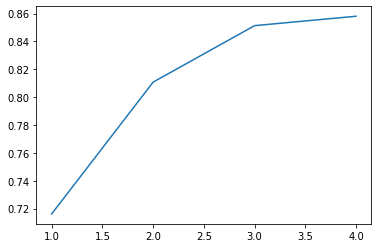

In [18]:
# KNN
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

list1 = []
for neighbors in range(1,5):
    classifier = KNeighborsClassifier(n_neighbors=neighbors, metric='minkowski')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
plt.plot(list(range(1,5)), list1)
plt.show()

In [19]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc_knn = accuracy_score(y_test, y_pred)
mylist.append(acc_knn)
print(cm)
print(acc_knn,'%')

[[126   0   0   0   0   0   0   1   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  4   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0   0   0   0   0]]
0.8513513513513513 %


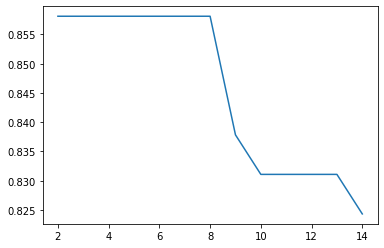

In [20]:
# DecisionTreeClassifier


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for leaves in range(2,15):
    classifier = DecisionTreeClassifier(max_leaf_nodes = leaves, random_state=0, criterion='entropy')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
#print(mylist)
plt.plot(list(range(2,15)), list1)
plt.show()

In [21]:
classifier = DecisionTreeClassifier(max_leaf_nodes = 5, random_state=0, criterion='entropy')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc_decisiontree = accuracy_score(y_test, y_pred)
print(cm)
print(acc_decisiontree, '%')
mylist.append(acc_decisiontree)

[[127   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0   0   0   0]
 [  4   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0   0   0   0]]
0.8581081081081081 %


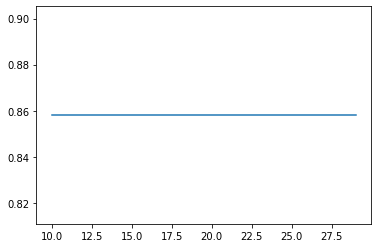

In [22]:
# RANDOM FOREST CLASSIFCATION
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for estimators in range(10,30):
    classifier = RandomForestClassifier(n_estimators = estimators, random_state=0, criterion='entropy')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
#print(mylist)
plt.plot(list(range(10,30)), list1)
plt.show()

In [23]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 15, criterion='entropy', random_state=0)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc_randomforest = accuracy_score(y_test, y_pred)
mylist.append(acc_randomforest)
print(cm)
print(acc_randomforest,'%')

[[127   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0   0   0   0]
 [  3   0   0   0   0   0   0   0   0   0   0   0   1]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0   0   0   0]]
0.8581081081081081 %


In [36]:
# ANN (neural network )
import tensorflow as tf
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras import callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)
# Initialising the NN
model = Sequential()

# layers

model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
opt = Adam(learning_rate=0.00009)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
model.fit(x_train, y_train, batch_size = 10, epochs = 150, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/150
28/28 [==============================] - 1s 11ms/step - loss: 0.6834 - accuracy: 0.0218 - val_loss: 0.6677 - val_accuracy: 0.0000e+00
Epoch 2/150
28/28 [==============================] - 0s 5ms/step - loss: 0.6602 - accuracy: 0.0000e+00 - val_loss: 0.6427 - val_accuracy: 0.0000e+00
Epoch 3/150
28/28 [==============================] - 0s 4ms/step - loss: 0.6374 - accuracy: 0.0000e+00 - val_loss: 0.6163 - val_accuracy: 0.0000e+00
Epoch 4/150
28/28 [==============================] - 0s 4ms/step - loss: 0.6145 - accuracy: 0.0000e+00 - val_loss: 0.5890 - val_accuracy: 0.0000e+00
Epoch 5/150
28/28 [==============================] - 0s 4ms/step - loss: 0.5905 - accuracy: 0.0000e+00 - val_loss: 0.5620 - val_accuracy: 0.0000e+00
Epoch 6/150
28/28 [==============================] - 0s 4ms/step - loss: 0.5682 - accuracy: 0.0000e+00 - val_loss: 0.5345 - val_accuracy: 0.0000e+00
Epoch 7/150
28/28 [==============================] - 0s 4ms/step - loss: 0.5432 - accuracy: 0.0000e+00 - val_

In [38]:
import numpy as np
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.9)
np.set_printoptions()

from sklearn.metrics import confusion_matrix, accuracy_score

# confusion matrix
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print(cm)
print()

# accuracy
ac_ann = accuracy_score(y_test,y_pred)
print("Accuracy")
print(ac_ann)
mylist.append(ac_ann)

5/5 [==============================] - 0s 17ms/step
Confusion Matrix
[[  0 127   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   2   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   2   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   4   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   2   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   2   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   2   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   2   0   0   0   0   0   0   0   0   0   0   0   0]]

Accuracy
0.0


In [26]:
# DNN
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout, Dense, Input

i = Input(shape=(None, 455, 11))

x = Dense(16, activation='relu')(i)
x = Dropout(0.5)(x)

x = Dense(32, activation='relu')(i)
x = Dropout(0.5)(x)

x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)

x = Dense(32, activation='relu')(x)
x = Dropout(0.5)(x)

x = Dense(16, activation='relu')(x)
x = Dropout(0.5)(x)

y = Dense(1, activation='sigmoid')(x)

dnn_adam = Model(inputs=i, outputs=y)

dnn_adam.compile(optimizer='adam', 
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

dnn_adam.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, 455, 11)]   0         
                                                                 
 dense_12 (Dense)            (None, None, 455, 32)     384       
                                                                 
 dropout_8 (Dropout)         (None, None, 455, 32)     0         
                                                                 
 dense_13 (Dense)            (None, None, 455, 64)     2112      
                                                                 
 dropout_9 (Dropout)         (None, None, 455, 64)     0         
                                                                 
 dense_14 (Dense)            (None, None, 455, 32)     2080      
                                                                 
 dropout_10 (Dropout)        (None, None, 455, 32)     0   

In [27]:
early_stopping = EarlyStopping(monitor='val_loss', patience=25)

history_adam = dnn_adam.fit(x=x_train, y=y_train,
                             validation_data=(x_test, y_test),
                             epochs=300,
                             callbacks=[early_stopping])

Epoch 1/300


 8/11 [====================>.........] - ETA: 0s - loss: 11.9440 - accuracy: 0.6523 

11/11 [==============================] - 2s 66ms/step - loss: 11.8531 - accuracy: 0.6541 - val_loss: 3.3362 - val_accuracy: 0.8514
Epoch 2/300
11/11 [==============================] - 0s 15ms/step - loss: 4.8198 - accuracy: 0.6017 - val_loss: 1.4433 - val_accuracy: 0.6689
Epoch 3/300
11/11 [==============================] - 0s 6ms/step - loss: 6.5367 - accuracy: 0.5029 - val_loss: -0.0206 - val_accuracy: 0.3243
Epoch 4/300
11/11 [==============================] - 0s 6ms/step - loss: 1.5436 - accuracy: 0.4360 - val_loss: -1.1771 - val_accuracy: 0.0676
Epoch 5/300
11/11 [==============================] - 0s 7ms/step - loss: -2.7488 - accuracy: 0.3081 - val_loss: -2.3677 - val_accuracy: 0.0068
Epoch 6/300
11/11 [==============================] - 0s 6ms/step - loss: -2.6343 - accuracy: 0.2238 - val_loss: -3.6679 - val_accuracy: 0.0000e+00
Epoch 7/300
11/11 [==============================] - 0s 7ms/step - loss: -5.9535 - accuracy: 0.1802 - val_loss: -5.1439 - val_accuracy: 0.0000e+00
Epoch 

In [28]:
import numpy as np
y_pred = dnn_adam.predict(x_test)
y_pred = (y_pred > 0.9)
np.set_printoptions()

from sklearn.metrics import confusion_matrix, accuracy_score

# confusion matrix
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print(cm)
print()

# accuracy
ac_dnn = accuracy_score(y_test,y_pred)
print("Accuracy")
print(ac_dnn)
mylist.append(ac_dnn)

5/5 [==============================] - 0s 3ms/step
Confusion Matrix
[[  0 127   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   2   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   2   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   4   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   2   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   2   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   2   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   2   0   0   0   0   0   0   0   0   0   0   0   0]]

Accuracy
0.0


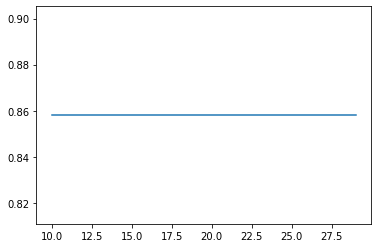

In [29]:
# xgboost
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for estimators in range(10,30,1):
    classifier = XGBClassifier(n_estimators = estimators, max_depth=12, subsample=0.7)
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
#print(mylist)
plt.plot(list(range(10,30,1)), list1)
plt.show()

In [30]:
from xgboost import XGBClassifier
classifier = XGBClassifier(n_estimators = 15, max_depth=12, subsample=0.7)
classifier.fit(x_train,y_train)

XGBClassifier(max_depth=12, n_estimators=15, objective='multi:softprob',
              subsample=0.7)

In [31]:
y_pred = classifier.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac_xgboost = accuracy_score(y_test, y_pred)
mylist.append(ac_xgboost)
print(cm)
print(ac_xgboost)

[[127   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0   0   0   0]
 [  4   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0   0   0   0]]
0.8581081081081081


In [32]:
# catboost
!pip install catboost

from catboost import CatBoostClassifier
classifier = CatBoostClassifier()
classifier.fit(x_train, y_train)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.8 MB 1.3 MB/s 
Learning rate set to 0.074936
0:	learn: 3.0255109	total: 99.9ms	remaining: 1m 39s
1:	learn: 2.6920631	total: 144ms	remaining: 1m 11s
2:	learn: 2.4550685	total: 186ms	remaining: 1m 1s
3:	learn: 2.2904610	total: 227ms	remaining: 56.5s
4:	learn: 2.1293887	total: 269ms	remaining: 53.5s
5:	learn: 2.0158895	total: 317ms	remaining: 52.6s
6:	learn: 1.8858329	total: 362ms	remaining: 51.4s
7:	learn: 1.7776244	total: 404ms	remaining: 50.1s
8:	learn: 1.6780458	total: 449ms	remaining: 49.5s
9:	learn: 1.6115143	total: 495ms	remaining: 49s
10:	learn: 1.5550562	total: 542ms	remaining: 48.8s
11:	learn: 1.4987853	total: 590ms	remaining: 48.6s
12:	learn: 1.4614513	total: 633ms	remaining: 48.1s
13:	learn: 1.4042493	total: 680ms	remaining: 47.9s
14:	learn: 1.3652640	total: 722ms	remaining: 47.4s
15:	learn: 1.3273643	total: 771ms	remaining: 47.4s
16:	le

In [33]:
y_pred = classifier.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac_catboost = accuracy_score(y_test, y_pred)
mylist.append(ac_catboost)
print(cm)
print(ac_catboost)

[[127   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0   0   0   0]
 [  4   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0   0   0   0   0   0]]
0.8581081081081081


In [39]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'ANN', 'DNN',  
              'Decision Tree','xgboost','catboost'],
    'Score': [acc_knn, acc_logreg, 
              acc_randomforest, ac_ann, ac_dnn, acc_decisiontree,ac_xgboost,ac_catboost
              ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Logistic Regression,0.858108
2,Random Forest,0.858108
5,Decision Tree,0.858108
6,xgboost,0.858108
7,catboost,0.858108
0,KNN,0.851351
3,ANN,0.000000
4,DNN,0.000000


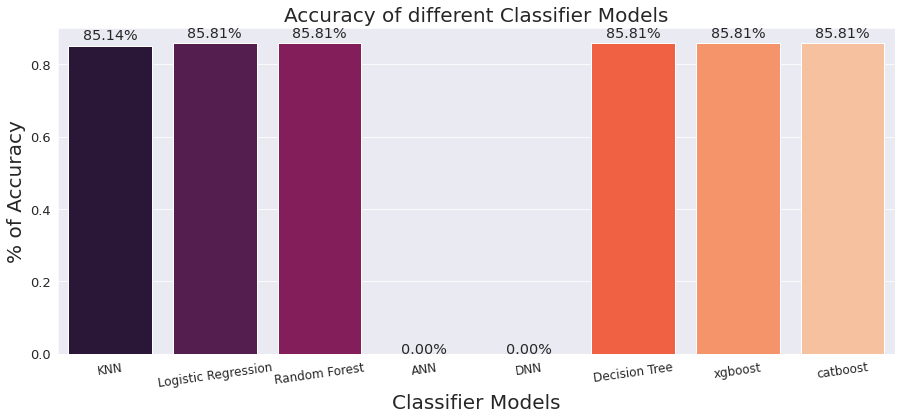

In [40]:
import seaborn as sns 
plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")
ax = sns.barplot(x=models.Model, y=models.Score, palette = "rocket", saturation =1.5)
plt.xlabel("Classifier Models", fontsize = 20 )
plt.ylabel("% of Accuracy", fontsize = 20)
plt.title("Accuracy of different Classifier Models", fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()